# Section 3 : 3d visualisation and plotting

Schema :
  * Introduce Geovista
  * Explain context of 3D and "traditional" matplotlib-based plotting

## 3D visualisation

While LFRic data can be presented in 2D plots with a map projection, it is often more profitable way to explore it with a 3D viewer.  

There are a few reasons for this :
  1. the LFRic model grid does not follow a 2d, lat-lon aligned structure (unlike UM)
  2. LFRic data is now tending to be too large for matplotlib-style plotting (~6 million cells)


In [1]:
# Essential setup
# %matplotlib inline
# import pyvista as pv
# pv.rcParams["use_ipyvtk"] = True

## What Geovista is for

  * **VTK** : highly mature 3D visualisation library (C++)
  * **PyVista** : VTK for normal humans (in Python)
  * **Geovista** : geolocation for PyVista
     * map projections + transforms
     * geolocated data and regions
     * coastlines



In [3]:
# Import things from Geovista
import geovista as gv

In [4]:
# Copied from : https://github.com/bjlittle/geovista/blob/main/src/geovista/examples/from_2d__orca.py
from geovista.pantry import um_orca2

sample = um_orca2()

In [5]:
sample.lats.shape

(148, 180, 4)

In [6]:
# Handy routine
import display_demo_routines
from importlib import reload
reload(display_demo_routines)

from display_demo_routines import popup_2d_data_xx_yy


## Geovista basic demo : an interactive plot of ocean data

In [7]:
popup_2d_data_xx_yy(sample, "ORCA test data")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

**NOTE**
  * Geovista is not Iris-dependent
  * Iris does not (yet) fully integrate Geovista
  * .. therefore user code is currently needed to bridge the two
  * .. **but** the gap is fairly small, and this makes Geovista more generally useful




## Create a plotter, and display 3D visualisation

The above example shows some interesting features, but it is only a 'potted' demonstration.  
Let's grab some actual LFRic data and examine the actual plotting mechanism in a bit more detail.  

The simplest way, as seen in [Sec#02 - Quick 3d plotting](./Sec_02_Meshes.ipynb#Quick-3d-plotting), is just to call `PolyData.plot()`, but that is rather limited in what it can do.

For more control, we need to deal with the GeoVista/PyVista `Plotter` object.  
The full process for this requires a number of several discrete steps ...

**(1) First load in the same 2D 'relative_humidity' datacube we loaded back in [Section#02 "Fetch some sample data"](./Sec_02_Meshes.ipynb#Fetch-some-sample-unstructured-data,-as-used-in-Section#01)**

In [8]:
# TODO: remove when switched to fulltime lower-res test data
from testdata_fetching import switch_data
switch_data(use_newer_smaller_c48_data=True)

In [9]:
from testdata_fetching import lfric_rh_singletime_2d
lfric_rh = lfric_rh_singletime_2d()

---

**(2) convert the Iris cube to a PyVista `PolyData`, as in [Section#02 "Convert a cube to PyVista form"](./Sec_02_Meshes.ipynb#Convert-a-cube-to-PyVista-form-for-plotting)**

In [10]:
from pv_conversions import pv_from_lfric_cube
pv = pv_from_lfric_cube(lfric_rh)

---

Now, we need a [PyVista "plotter"](https://docs.pyvista.org/api/plotting/_autosummary/pyvista.Plotter.html#pyvista.Plotter) object to display things in 3D.  
Since our data is geo-located, we will use the special subtype `GeoPlotter`, from [GeoVista](https://github.com/bjlittle/geovista#philisophy) for this.

**Import the class `GeoPlotter` from the `geovista` package, and create one** (with no arguments)
<details><summary>Sample code solution : <b>click to reveal</b></summary>

```python
from geovista import GeoPlotter
plotter = GeoPlotter()
```
</details>

In [11]:
from geovista import GeoPlotter
plotter = GeoPlotter()

Note: various control arguments can be added to `GeoPlotter()`.  
But none are required by default.

---

**Now call the plotter `add_mesh` function, passing in our PolyData object with the Rh cube data in it.**  
( **N.B.** don't worry about the object which this passes back -- just discard it, for now ).
<details><summary>Sample code solution : <b>click to reveal</b></summary>

```python
_ = plotter.add_mesh(pv)
```
</details>

In [12]:
_ = plotter.add_mesh(pv)

---

**Finally, simply plot this, by calling the plotter function "show" (with no args).**
<details><summary>Sample code solution : <b>click to reveal</b></summary>

```python
plotter.show()
```
</details>

In [ ]:
plotter.show()

**Some odd notes:**
  * VTK/PyVista doesn't use plot "types".  
    Instead, you add meshes to a plotter + can subsequently control the presentation.
  * By default, `plotter.show()` opens an interactive window : **you can rotate and zoom it with the mouse**.
    * you can instead generate static output 
        * in a notebook, you do this with `jupyter_backend='static'`
        * or in a Python session, try `interactive=False`
  * GeoVista can also produce more familiar 2D plots (described in a later section ...)


***TODO:*** can suggest some of these as follow-on exercises

## Additional features

The above hasn't yet added anything to the basic `PolyData.plot()` call.

However, when you create your own GeoPlotter, you can do a lot more to control the view, and add useful aspects.

**What can each of the following GeoPlotter methods do ?...**
( N.B. there is no rendered GeoVista API yet, but you can see the code docstrings, e.g. [here] )
  * **`add_coastlines`**
  * **`add_axes`**
  * **`add_base_layer`**  (hint: look in the source of the `demo_display_2d_xx_yy_data` routine)
  * **`add_camera_orientation_widget`**

Note : of these, 'coastlines' and 'base_layer' are GeoVista concepts, while 'axes' and 'camera_orientation_widget' are from PyVista.  The `GeoPlotter` is simply a specialised (extended) version of a `PyVista.Plotter`.

Another very useful resource is the GeoVista runnable examples.  
See : https://github.com/bjlittle/geovista/tree/main/src/geovista/examples

In [73]:
# .. space for user code (E.G. try "add_coastlines") ...

In [74]:
# .. space for user code (E.G. try "add_base_layer") ...

In [75]:
# .. space for user code (E.G. try "add_axes") ...

# Comparing UM and LFRic fields

In [22]:
from testdata_fetching import um_rh_singletime_2d
#um_rh = iris.load_cube(um_filepth, 'relative_humidity')
um_rh = um_rh_singletime_2d()
# Rename so we are clear which model this came from
um_rh.rename('UM Rh data')
um_rh

<iris 'Cube' of UM Rh data / (%) (latitude: 144; longitude: 192)>

---

Just as a reference, let's quickly show that on an old-style Iris matplotlib plot.

**Display this cube (ordinary, "structured" data) by passing it into the routine `iris.quickplot.pcolormesh`.**

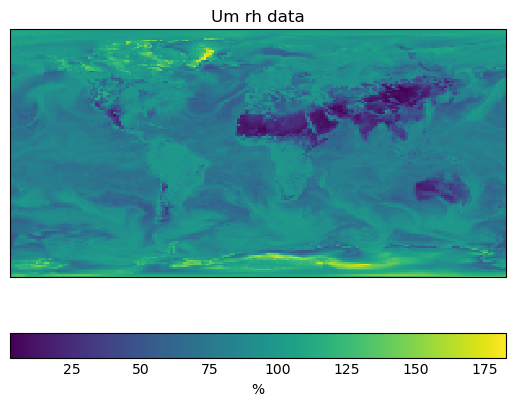

In [23]:
import iris.quickplot  as qplt
qplt.pcolormesh(um_rh)

---
Now to plot this in 3d.  

For this, we have another utility routine which allows us to convert "ordinary" structured cubes into PyVista `PolyData`.

**Convert this UM cube to a PolyData, with the routine `pv_conversions.pv_from_um_cube`, and display it in 3D.** 

In [24]:
from pv_conversions import pv_from_um_cube
um_pv = pv_from_um_cube(um_rh)
um_pv.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

**Note :** 
This is still traditional "structured" data on its original UM lat-lon grid.

You can see this clearly by zooming in on a pole, where the cells get very narrow.

## Simple side-by-side plotting : UM vs LFRic data

Let's compare the matched UM and LFRic data fields by eye, in side-by-side 3D view.

This is mostly a demonstration of what can be achived, somewhat complicated,  
so we have provided another utility routine ...

**import the function `side_by_side_plotter` from `display_demo_routines`, and apply it to the UM and LFRic data cubes as arguments.  
Then display the `Plotter` which this returns.**

In [ ]:
from display_demo_routines import side_by_side_plotter
plt = side_by_side_plotter(pv, um_pv)
plt.show()

## A handy hint : how to record + re-use a camera view

In [ ]:
viewpoint = my_plotter.camera_position
viewpoint

In [ ]:
# This pre-loaded position focusses on a cubesphere "corner" in the middle East
viewpoint = [
    (0.9550352379408845, 0.9378277371075855, 0.9637172962958191),
    (0.0, 0.0, 0.0),
    (-0.3202752464164225, -0.5004192729867466, 0.8043657860428399)
]
viewpoint = [
    (1.1555926379084704, 1.1347715619001786, 1.1660979285179414),
    (0.0, 0.0, 0.0),
    (-0.3202752464164226, -0.5004192729867467, 0.80436578604284)
]

In [ ]:
# Plot just the LFRIC data with the same view ...
new_plotter = GeoPlotter()
new_plotter.add_coastlines()
new_plotter.add_mesh(pv, show_edges=True)
new_plotter.camera_position = viewpoint
new_plotter.show(jupyter_backend='static')

In [ ]:
new_plotter.camera_position

In [ ]:
# WIP : projected 2D plotting

In [ ]:
# GeoVista coastline projection not yet supported. Use a representation of coastlines as Cube data instead.

# import requests
# r = requests.get("https://github.com/SciTools-incubator/presentations/raw/main/ngms_champions_2022-04-12/coastline_grid.nc")
# open("coastline_grid.nc", "wb").write(r.content)

# coastline_cube = iris.load_cube("coastline_grid.nc")

# coastline_polydata = pv_from_structcube(coastline_cube)
# # Remove all NaN's (grid squares that aren't on a coast).
# coastline_polydata = coastline_polydata.threshold()

In [ ]:
def plot_projected(my_polydata, plotter=None):
    """Plot polydata on a given plotter"""
    if plotter is None:
        plotter = GeoPlotter()
    # Add the coastline cells 'above' the data itself.
    plotter.add_mesh(
        coastline_polydata,
        color="white",
        show_edges=True,
        edge_color="white",
        radius=1.1,     # For globe plots
        zlevel=10,       # For planar plots
    )
    plot_polydata = my_polydata.copy()
    plotter.add_mesh(plot_polydata)
    # if plotter.crs != WGS84:
    #     # Projected plot.
    #     plotter.camera_position = "xy"
    #     backend = "static"
    # else:
    #     backend = "pythreejs"
#         backend = "static"
    plotter.show()  # jupyter_backend=backend)

In [ ]:
# Plot these side-by-side ...
